# Diffuse relfectance spectroscopy for species classification

This is a script to perform preprocessing of IR data from mosquito legs using diffuse reflectance spectroscopy.
V.03 - 06-09-2022
- Added confusion matrix for nested cross validation
- improved plot asthetics

V.02 - 28-06-2022
- All functions and code have been modularize: transformers, functions, plot fuctions are in the scr folder.
- Accuracy for each preprocessing calculated using GridSearchCV
- Script is now a cloned repository in Github

V.01 - 13-06-2022 
- It eliminates dataleakge during preprocessing by using pipelines
- Added lines at 0.5 accuracy (random model)
- Eliminated violin plots (too confusing), replaced by box plots
- Added lablebinarizer for species encoding
- Added progress bar on the loops
- Added propoer accuracy assesment for each preprocessing

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
## library
import pandas as pd
import matplotlib.pyplot as plt
import sys
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import seaborn as sn
import numpy as np

sys.path.append('/Users/mauropazmino/Documents/chapter_2/src')
from preprocessing import cut_spectra
from preprocessing import balance_groups
from preprocessing import baseline_gridsearch
from preprocessing import prepo_results_windows
from preprocessing import final_df_preprocessing
from preprocessing import boxplot_preprocessing

from preprocessing import baseline_gridsearch_MSC
from preprocessing import baseline_gridsearch_RNV
from preprocessing import baseline_gridsearch_SNV


## Load data

In [11]:
#load data
X = pd.read_csv("/Users/mauropazmino/Documents/chapter_2/data/processed/X_species.csv")
y = pd.read_csv("/Users/mauropazmino/Documents/chapter_2/data/processed/y_species.csv")

In [12]:
# binary labels
lb = LabelBinarizer()
y_encoded = lb.fit_transform(y)

In [13]:
# Divide the data set into TRAIN and TEST(test will be the independet validation set)
seed = 7

X_tr, X_ts, y_tr, y_ts = train_test_split(X, y_encoded, test_size=0.2,stratify=y,random_state=seed)

## Baseline perfomance of different ML algoritms with different preprocessing methods

I calculate the baseline perfomance of various ML models with different preprocessing methods and smoothing windows: RNV, SNV, MSC and standard scaler

In [14]:
# define the windows for savgol smoothing
windows=[9,11,21]

In [15]:
# raw

total_zero_order = []
for i in windows: 
    scores = baseline_gridsearch(X_tr, y_tr,i,0)
    total_zero_order.append(scores)

total_first_order = []
for i in windows: 
    scores = baseline_gridsearch(X_tr, y_tr,i,1)
    total_first_order.append(scores)

total_second_order = []
for i in windows: 
    scores = baseline_gridsearch(X_tr, y_tr,i,2)
    total_second_order.append(scores)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits


In [16]:
# SNV
snv_first_order = []
for i in windows: 
    scores = baseline_gridsearch_SNV(X_tr, y_tr,i,1)
    snv_first_order.append(scores)

snv_second_order = []
for i in windows: 
    scores = baseline_gridsearch_SNV(X_tr, y_tr,i,2)
    snv_second_order.append(scores)

snv_zero_order = []
for i in windows: 
    scores = baseline_gridsearch_SNV(X_tr, y_tr,i,0)
    snv_zero_order.append(scores)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits


In [17]:
# RNV
rnv_zero_order = []
for i in windows: 
    scores = baseline_gridsearch_RNV(X_tr, y_tr,i,0)
    rnv_zero_order.append(scores)

rnv_first_order = []
for i in windows: 
    scores = baseline_gridsearch_RNV(X_tr, y_tr,i,1)
    rnv_first_order.append(scores)

rnv_second_order = []
for i in windows: 
    scores = baseline_gridsearch_RNV(X_tr, y_tr,i,2)
    rnv_second_order.append(scores)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits


In [18]:
# MSC
msc_zero_order = []
for i in windows: 
    scores = baseline_gridsearch_MSC(X_tr, y_tr,i,0)
    msc_zero_order.append(scores)

msc_first_order = []
for i in windows: 
    scores = baseline_gridsearch_MSC(X_tr, y_tr,i,1)
    msc_first_order.append(scores)

msc_second_order = []
for i in windows: 
    scores = baseline_gridsearch_MSC(X_tr, y_tr,i,2)
    msc_second_order.append(scores)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits


In [19]:
# Join the results for each preprocessing
raw_results = prepo_results_windows(total_zero_order, total_first_order, total_second_order,"raw")
snv_results = prepo_results_windows(snv_zero_order , snv_first_order, snv_second_order,"snv" )
rnv_results = prepo_results_windows(rnv_zero_order, rnv_first_order, rnv_first_order, "rnv")
msc_results = prepo_results_windows(msc_zero_order, msc_first_order, msc_second_order, "msc")

In [20]:
# concatenate all the preprocessing metdhos
dataframes = [raw_results, snv_results, rnv_results, msc_results]
df_concat = pd.concat(dataframes)

In [22]:
# change column names, tranform to long format and export to csv
preprocesing_final_results = final_df_preprocessing(df_concat)
preprocesing_final_results.to_csv("results/preprocessing_baseline.csv")


In [23]:
# Calculate the mean accuracy for each combination and print the best model
preprocessing_results_df = preprocesing_final_results.groupby(["Model", "Preprocessing","Derivative", "Window"])["Accuracy"].mean().reset_index()
bestmodel = preprocessing_results_df.loc[preprocessing_results_df["Accuracy"].idxmax()]
print("Best model is:\n", bestmodel)


Best model is:
 Model               RF
Preprocessing      msc
Derivative           2
Window               9
Accuracy         0.725
Name: 186, dtype: object


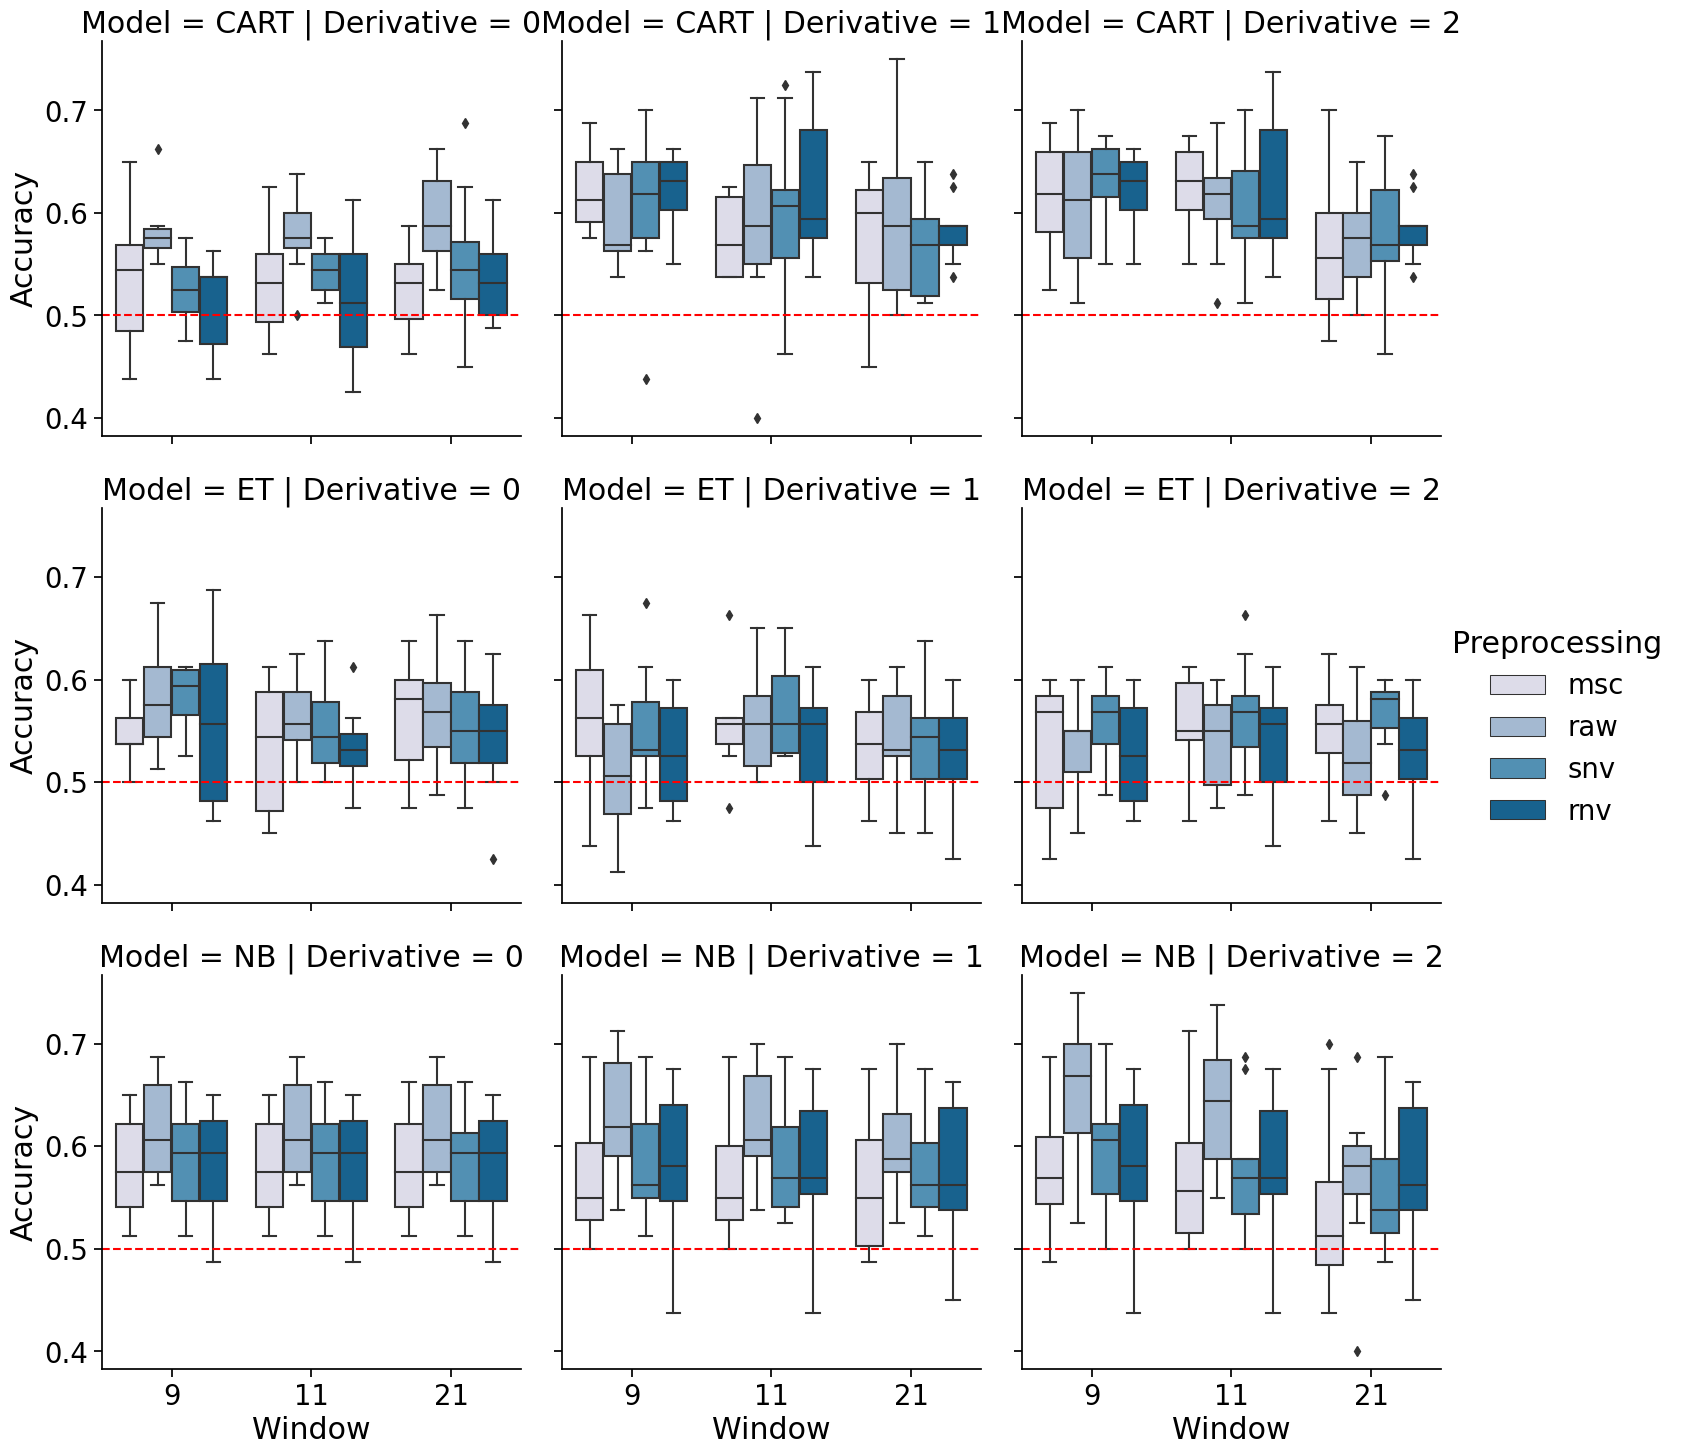

In [20]:
boxplot_preprocessing(preprocesing_final_results.loc[preprocesing_final_results['Model'].isin(['RF','CART','ET', 'NB'])])
plt.savefig("/Users/mauropazmino/Documents/chapter_2/plots/preprocessing_baseline_species_pt1", dpi=300, bbox_inches="tight")

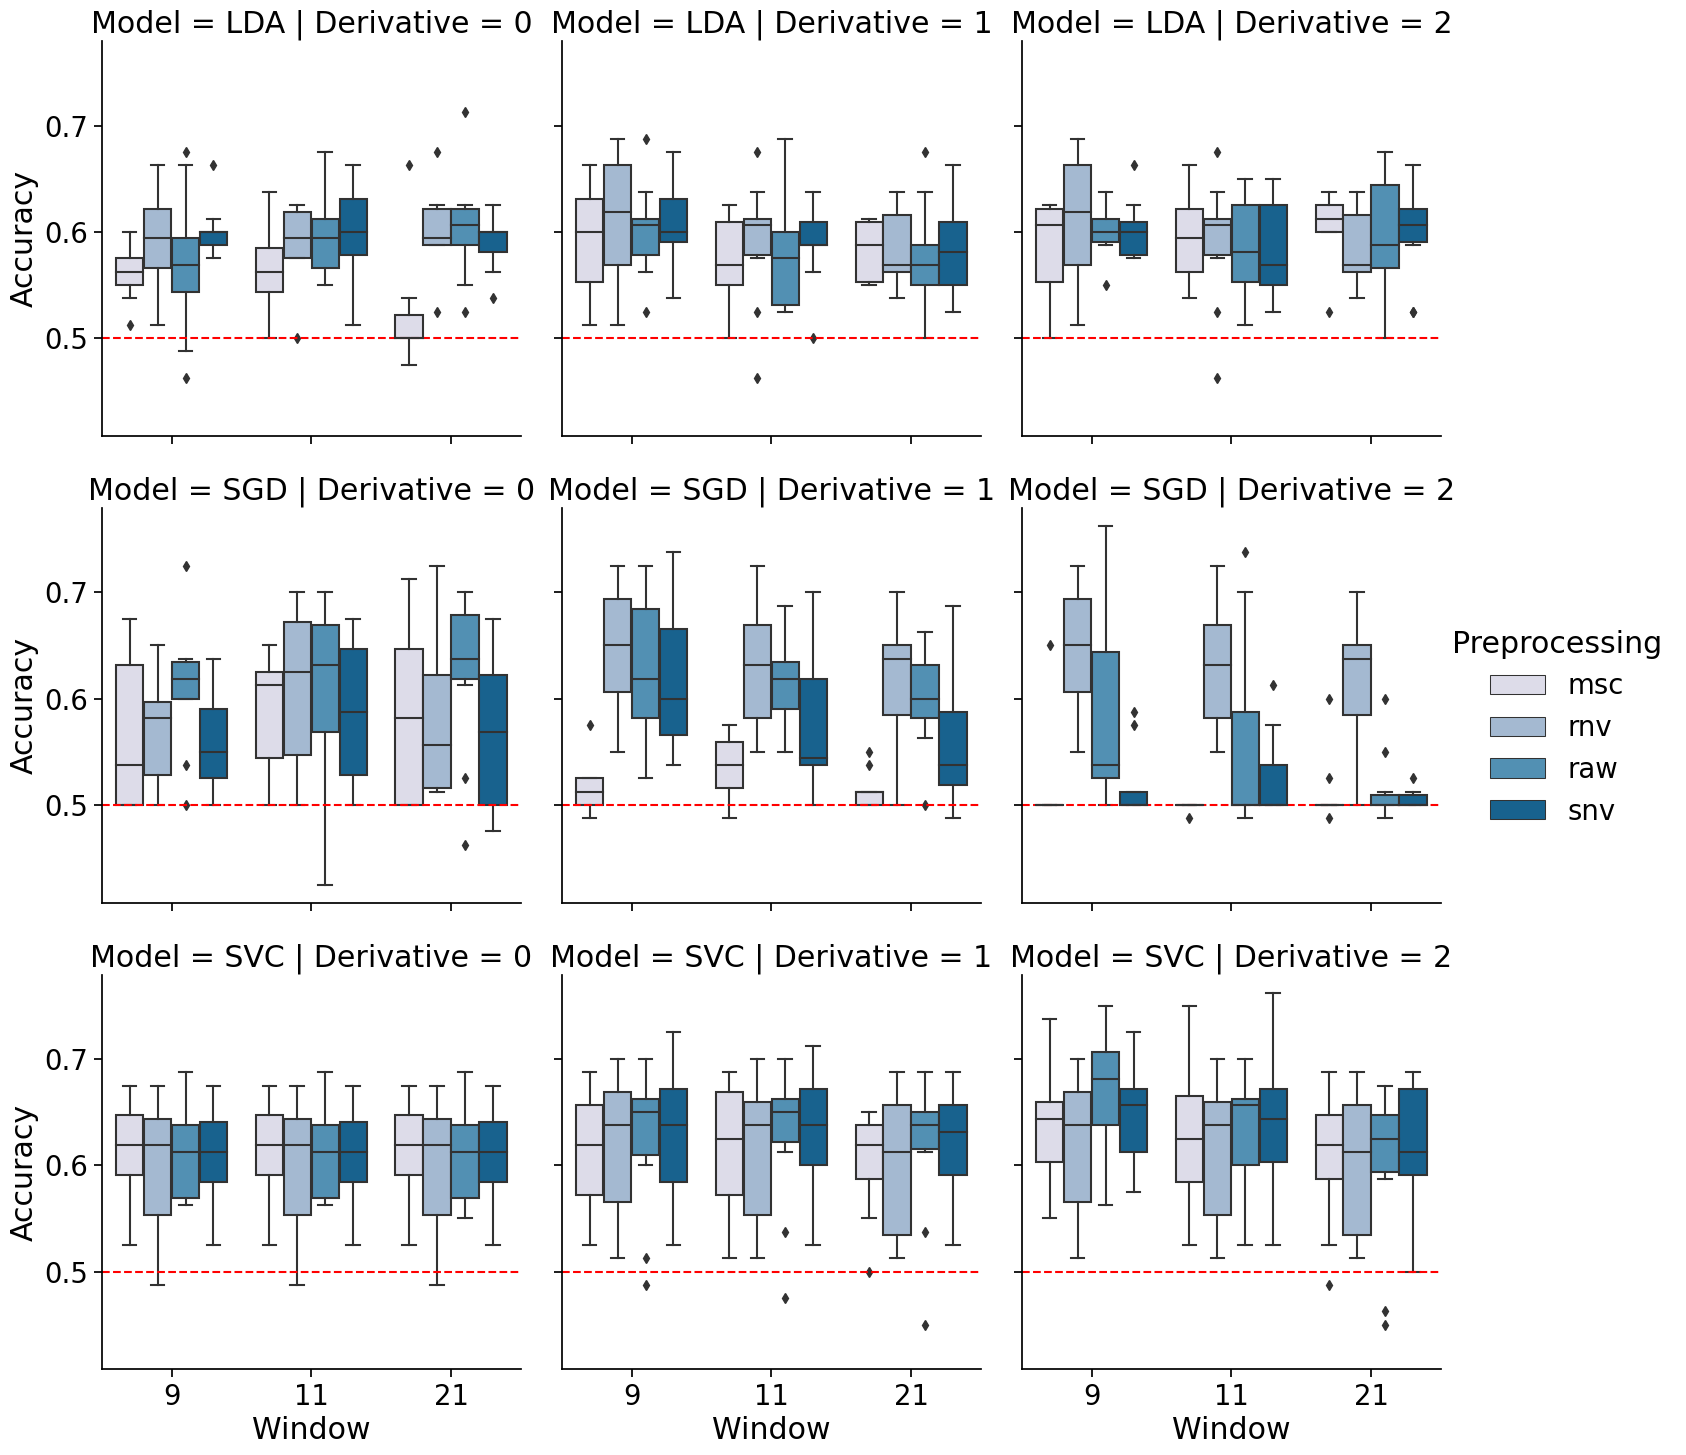

In [21]:
boxplot_preprocessing(preprocesing_final_results.loc[preprocesing_final_results['Model'].isin(['LDA','SVC', 'SGD'])])
plt.savefig("/Users/mauropazmino/Documents/chapter_2/plots/preprocessing_baseline_species_pt2", dpi=300, bbox_inches="tight")

In [5]:
final_results = pd.read_csv("/Users/mauro/Documents/Github/chapter_2/chapter_2/results/preprocessing_baseline.csv")

## Model optimization

In [26]:
# Optimization of RF

from optimization import model_optimization

optimization = model_optimization(X_tr, y_tr)

Best parameter (CV score=0.754):
{'rf__bootstrap': True, 'rf__max_depth': 110, 'rf__max_features': 3, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 12, 'rf__n_estimators': 200}


## Model evaluation
### Holdout set

In [28]:
# model evaluation
from evaluation import model_evaluation_species

evaluation, y_pred, coefficients = model_evaluation_species(X_tr,y_tr,X_ts,y_ts)
print(f'Accuracy holdout set = {evaluation:.2f}')

In [ ]:
y_ts_labeled = lb.inverse_transform(y_ts)
y_pred_labeled = lb.inverse_transform(y_pred)

from optimization_evaluation_multi import confusion_matrix_multiclass

confusion_matrix_multiclass(y_ts_labeled, y_pred_labeled)
plt.savefig("/Users/mauropazmino/Documents/chapter_2/plots/confusion_matrix_RF_species", dpi=300)

              precision    recall  f1-score   support

           0       0.74      0.70      0.72        33
           1       0.71      0.76      0.74        33

    accuracy                           0.73        66
   macro avg       0.73      0.73      0.73        66
weighted avg       0.73      0.73      0.73        66



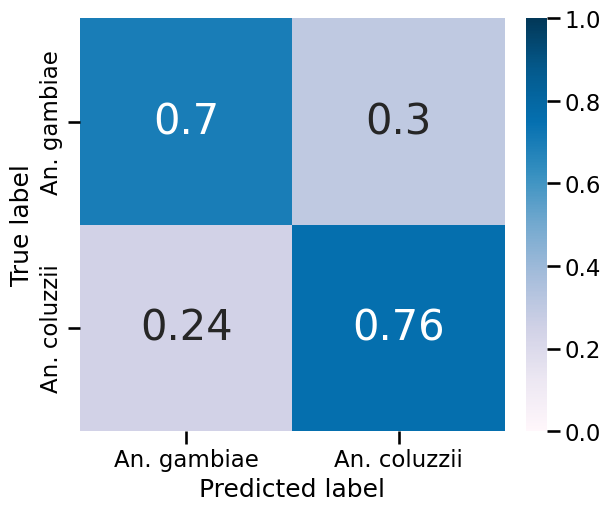

<Figure size 640x480 with 0 Axes>

In [33]:
from sklearn.metrics import classification_report
from evaluation import confusion_plot

confusion_plot(y_ts, y_pred)

plt.savefig("/Users/mauropazmino/Documents/chapter_2/plots/confusion_matrix_RF_species")

In [35]:
coefficients

array([5.36809680e-03, 3.15180668e-03, 6.33092514e-03, 8.18558362e-03,
       2.55138849e-03, 6.53885949e-04, 2.93517963e-03, 2.98504527e-03,
       1.56142974e-03, 3.45073170e-03, 2.26626243e-03, 1.91340348e-03,
       2.27836768e-03, 3.82069718e-03, 3.84692438e-03, 8.86026517e-04,
       5.74049425e-03, 3.77856722e-03, 2.69145332e-03, 3.85726607e-03,
       2.05654641e-03, 5.66770855e-03, 3.96171955e-03, 1.94815566e-03,
       1.59639486e-03, 7.17700133e-03, 4.43252375e-03, 3.39314361e-03,
       3.99370321e-03, 2.66315660e-03, 5.57659824e-03, 6.95794619e-03,
       5.60656534e-03, 6.88999445e-03, 9.68871661e-04, 1.51949556e-03,
       3.23064287e-03, 6.70829748e-03, 9.02975087e-03, 1.16059622e-03,
       8.22010265e-04, 2.26463842e-03, 2.93382398e-03, 3.07009012e-03,
       1.53038386e-03, 1.40461545e-03, 1.39927522e-03, 1.70112981e-03,
       2.38985158e-04, 1.47255410e-03, 1.22870246e-03, 1.43184835e-03,
       1.98261202e-03, 9.67038233e-04, 1.74867582e-03, 3.85167754e-03,
      

,Wavenumbers,Coefficients
38,1727,0.009030
3,1794,0.008186
25,1752,0.007177
31,1740,0.006958
33,1736,0.006890
37,1728,0.006708
2,1796,0.006331
16,1769,0.005740
21,1759,0.005668
32,1738,0.005607


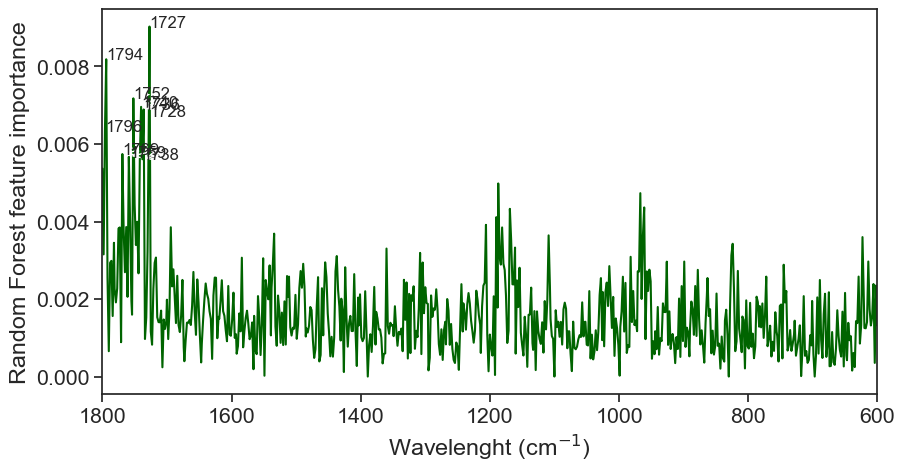

In [37]:
# model coefficients
from evaluation import wavenumberlist
from evaluation import variable_contribution_top10_plot

wavenumbers = wavenumberlist(X)

variable_importance_rf = pd.DataFrame()
variable_importance_rf['Wavenumbers'] = wavenumbers
variable_importance_rf['Coefficients'] = coefficients.T

variable_contribution_top10_plot(variable_importance_rf)


## Nested cross validation

In [38]:
from evaluation import nested_crossvalidation_species

In [39]:
y_real = y_encoded.ravel()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


>acc=0.818, est=0.746, cfg={'model__bootstrap': True, 'model__max_depth': 80, 'model__max_features': 2, 'model__min_samples_leaf': 5, 'model__min_samples_split': 8, 'model__n_estimators': 200}


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


>acc=0.727, est=0.737, cfg={'model__bootstrap': True, 'model__max_depth': 90, 'model__max_features': 3, 'model__min_samples_leaf': 4, 'model__min_samples_split': 10, 'model__n_estimators': 300}


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


>acc=0.697, est=0.791, cfg={'model__bootstrap': True, 'model__max_depth': 80, 'model__max_features': 3, 'model__min_samples_leaf': 5, 'model__min_samples_split': 12, 'model__n_estimators': 200}


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


>acc=0.758, est=0.749, cfg={'model__bootstrap': True, 'model__max_depth': 100, 'model__max_features': 3, 'model__min_samples_leaf': 3, 'model__min_samples_split': 8, 'model__n_estimators': 300}


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


>acc=0.758, est=0.743, cfg={'model__bootstrap': True, 'model__max_depth': 80, 'model__max_features': 3, 'model__min_samples_leaf': 5, 'model__min_samples_split': 10, 'model__n_estimators': 200}


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


>acc=0.697, est=0.778, cfg={'model__bootstrap': True, 'model__max_depth': 90, 'model__max_features': 3, 'model__min_samples_leaf': 5, 'model__min_samples_split': 10, 'model__n_estimators': 300}


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


>acc=0.818, est=0.757, cfg={'model__bootstrap': True, 'model__max_depth': 100, 'model__max_features': 3, 'model__min_samples_leaf': 4, 'model__min_samples_split': 8, 'model__n_estimators': 200}


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


>acc=0.697, est=0.793, cfg={'model__bootstrap': True, 'model__max_depth': 100, 'model__max_features': 3, 'model__min_samples_leaf': 3, 'model__min_samples_split': 10, 'model__n_estimators': 200}


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


>acc=0.758, est=0.745, cfg={'model__bootstrap': True, 'model__max_depth': 110, 'model__max_features': 3, 'model__min_samples_leaf': 4, 'model__min_samples_split': 8, 'model__n_estimators': 100}


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


>acc=0.606, est=0.753, cfg={'model__bootstrap': True, 'model__max_depth': 90, 'model__max_features': 3, 'model__min_samples_leaf': 4, 'model__min_samples_split': 8, 'model__n_estimators': 100}
Accuracy: 0.733 (0.060)


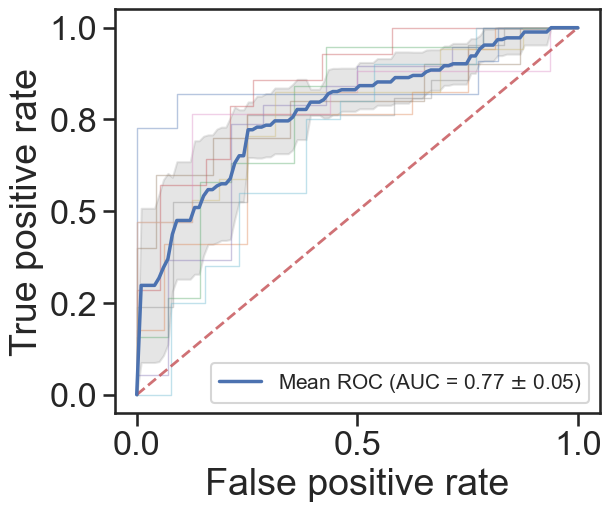

In [47]:
cm_nested = nested_crossvalidation_species(X, y_real)

In [51]:
plt.savefig("/Users/mauropazmino/Documents/chapter_2/plots/rocauc_species.png", bbox_inches="tight",dpi=300)

<Figure size 640x480 with 0 Axes>

In [48]:
import numpy as np
np.sum(cm_nested,axis=0)

array([[126,  39],
       [ 49, 116]])

In [49]:
cm_nested

[array([[18,  4],
        [ 2,  9]]),
 array([[12,  4],
        [ 5, 12]]),
 array([[12,  2],
        [ 8, 11]]),
 array([[14,  5],
        [ 3, 11]]),
 array([[11,  3],
        [ 5, 14]]),
 array([[16,  7],
        [ 3,  7]]),
 array([[14,  2],
        [ 4, 13]]),
 array([[ 9,  3],
        [ 7, 14]]),
 array([[11,  5],
        [ 3, 14]]),
 array([[ 9,  4],
        [ 9, 11]])]

In [88]:
y

,Species
0,AK
1,AK
2,AK
3,AK
4,AK
...,...
325,AC
326,AC
327,AC
328,AC


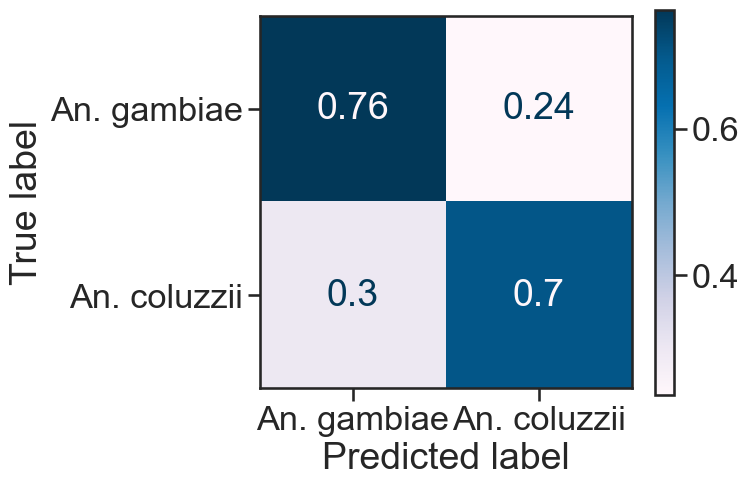

In [91]:
cm_nested_sum = np.sum(cm_nested,axis=0)
from optimization_evaluation_multi import confusion_matrix_nested

labels = ['An. gambiae','An. coluzzii']
confusion_matrix_nested(cm_nested_sum, labels)
plt.savefig("/Users/mauropazmino/Documents/chapter_2/plots/confusion_matrix_nested_species.png", bbox_inches="tight",dpi=300)

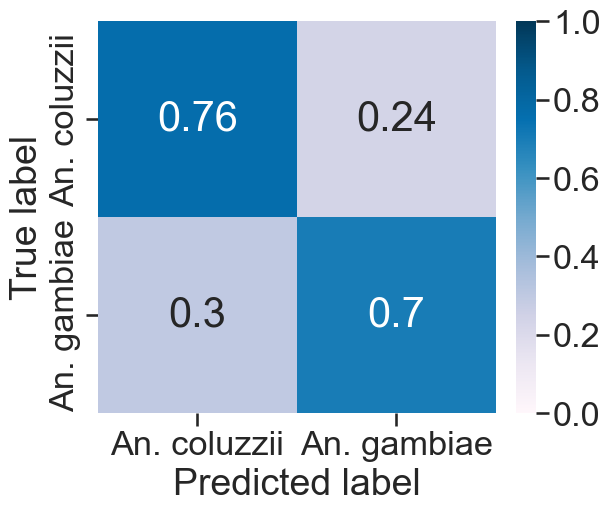

In [63]:
from evaluation import confusion_matrix_plot

labels = ['An. gambiae','An. coluzzii']
confusion_matrix_plot(np.sum(cm_nested,axis=0), labels )
plt.savefig("/Users/mauropazmino/Documents/chapter_2/plots/confusion_matrix_nested_species.png", bbox_inches="tight",dpi=300)

In [84]:
# sensitivity, specificity and precision

sensitivity = []
specificity = []
precision = []

for i in range(len(cm_nested)):
    TP = cm_nested[i][1][1]
    TN = cm_nested[i][0][0]
    FP = cm_nested[i][0][1]
    FN = cm_nested[i][1][0]
    sen = (TP / float(TP + FN))
    spe = (TN / float(TN + FP))
    prec = (TP / float(TP + FP))
    sensitivity.append(sen)
    specificity.append(spe)
    precision.append(prec)

print('Sensitivity: %.2f (%.2f)' % (np.mean(sensitivity), np.std(sensitivity)))
print('Specificity: %.2f (%.2f)' % (np.mean(specificity), np.std(specificity)))
print('Precision: %.2f (%.2f)' % (np.mean(precision), np.std(precision)))

Sensitivity: 0.71 (0.09)
Specificity: 0.76 (0.06)
Precision: 0.75 (0.10)


In [75]:
cm_nested[1][0][0]

12

In [70]:
import numpy as np
from sklearn.metrics import roc_auc_score

#>>> y = np.array([1, 1, 2, 2])
#>>> scores = np.array([0.1, 0.4, 0.35, 0.8])
model = np.array([1, 0, 1, 0, 0, 0, 0, 1])
hand = np.array([1, 0, 1, 0, 0, 1, 0, 1])


fpr, tpr, thresholds = metrics.roc_curve(hand, model)
roc_auc_score_v = roc_auc_score(hand, model)







In [71]:
roc_auc_score_v

0.875

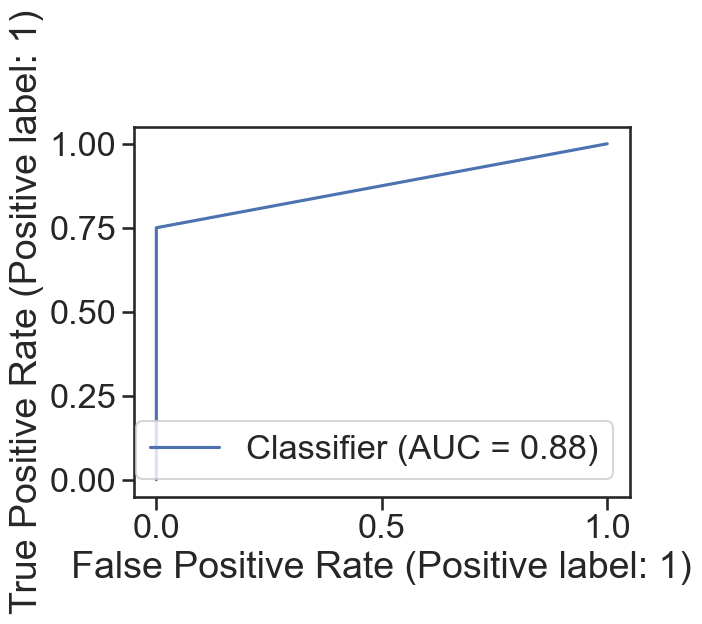

In [72]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(hand, model)
plt.show()

In [69]:
fpr

array([0., 0., 1.])

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
img = mpimg.imread('/Users/mauropazmino/Documents/chapter_2/plots/confusion_matrix_nested_age.png')
print(img)

[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 ...

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]]


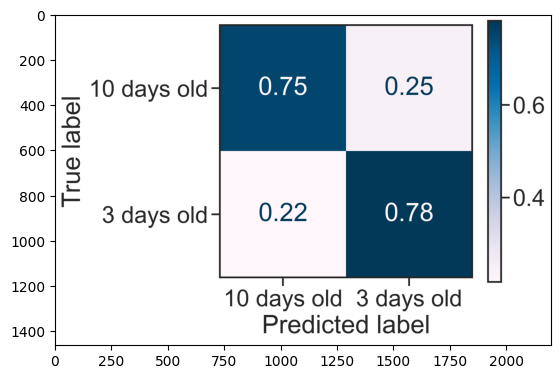

In [4]:


imgplot = plt.imshow(img)